In [ ]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install wget
import wget

# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types
link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data)

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=9b2b3169b2ab7fd5d878c0cfad7945494acdd8b906565d05de2b80f14a9c2fe5
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
#Setting up column names
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']
col_names = np.array(header_names)

# Differentiating between nominal, binary, and numeric features
nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [ ]:
# mapping each of the 22 different attacks to 1 of 5 categories (benign, dos, u2r, r2l, probe)
category = defaultdict(list)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])
attack_mapping

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

In [ ]:
#Processing Training Data

train_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'

train_df = pd.read_csv(train_file, names=header_names)

train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])

train_df.drop(['success_pred'], axis=1, inplace=True)

In [ ]:
#Processing test Data
test_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

,0
num_outbound_cmds,
0,125973


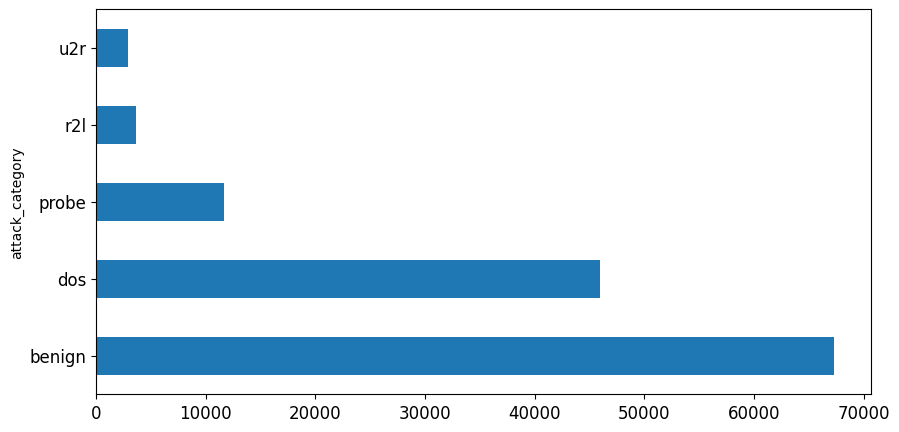

In [ ]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind='barh', figsize=(10,5), fontsize=12)

train_attack_cats.plot(kind='barh', figsize=(10,5), fontsize=12)

train_df[binary_cols].describe().transpose()
train_df.groupby(['su_attempted']).size()
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()
train_df.groupby(['num_outbound_cmds']).size()

In [ ]:
#dropping num_outbound_cmds from the dataset as it is not useful

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')

In [ ]:
#Data Preparation

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)


combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))


In [ ]:
train_x.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Let's proceed with StandardScaler- Apply to all the numeric columns
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])

train_x.describe()


<ipython-input-12-7f014f6d2df4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x[numeric_cols] = \
<ipython-input-12-7f014f6d2df4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x[numeric_cols] = \


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,1.259730e+05,1.259730e+05,1.259730e+05,125973.000000,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,125973.000000,1.259730e+05,...,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05
mean,2.549477e-17,-4.512349e-19,7.614590e-19,0.000198,4.230328e-19,4.455945e-18,-2.244894e-17,2.989431e-18,0.395736,-6.549957e-18,...,-1.756996e-17,-5.815290e-17,-1.215514e-16,-2.374624e-17,2.899184e-17,3.068398e-17,1.711873e-17,-2.631264e-17,4.907180e-17,7.749960e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,0.014086,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.489010,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.102492e-01,-7.762241e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,-1.836071e+00,-1.044721e+00,-1.161030e+00,-4.390782e-01,-4.801968e-01,-2.891034e-01,-6.395319e-01,-6.248708e-01,-3.876346e-01,-3.763870e-01
25%,-1.102492e-01,-7.762241e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,-1.009507e+00,-9.543885e-01,-1.049659e+00,-4.390782e-01,-4.801968e-01,-2.891034e-01,-6.395319e-01,-6.248708e-01,-3.876346e-01,-3.763870e-01
50%,-1.102492e-01,-7.754745e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,7.343426e-01,-4.756270e-01,-2.504011e-02,-3.332138e-01,-4.801968e-01,-2.891034e-01,-6.395319e-01,-6.248708e-01,-3.876346e-01,-3.763870e-01
75%,-1.102492e-01,-7.715224e-03,-4.790326e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,1.000000,-1.166364e-02,...,7.343426e-01,1.258754e+00,1.066401e+00,-6.855302e-02,-2.860195e-01,-1.114257e-01,1.608759e+00,1.618955e+00,-3.876346e-01,-3.763870e-01
max,1.636428e+01,2.350675e+02,3.257486e+02,1.000000,1.174348e+01,2.088191e+02,3.571955e+01,1.104972e+02,1.000000,3.123689e+02,...,7.343426e-01,1.258754e+00,1.066401e+00,4.854138e+00,2.756092e+00,8.594782e+00,1.608759e+00,1.618955e+00,2.874410e+00,2.753914e+00


In [ ]:
train_Y_bin = train_Y.apply(lambda x: 0 if x == 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x == 'benign' else 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
0.2378903477643719


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Define the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=17)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_x, train_Y)

# Get the best estimator
best_dt_classifier = grid_search.best_estimator_

# Fit the best Decision Tree model to the training data
best_dt_classifier.fit(train_x, train_Y)

# Predict on the test data
pred_y_dt = best_dt_classifier.predict(test_x)

# Obtain the confusion matrix
conf_matrix_dt = confusion_matrix(test_Y, pred_y_dt)

# Calculate performance metrics
precision_dt = precision_score(test_Y, pred_y_dt, average='weighted', zero_division=0) * 100
recall_dt = recall_score(test_Y, pred_y_dt, average='weighted', zero_division=0) * 100
f1_dt = f1_score(test_Y, pred_y_dt, average='weighted', zero_division=0) * 100
false_alarm_dt = 100 * (conf_matrix_dt[0, 1] / (conf_matrix_dt[0, 0] + conf_matrix_dt[0, 1]))

# Print the best hyperparameters and results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Confusion Matrix:\n{conf_matrix_dt}")

# Create a performance summary table
performance_summary_dt = pd.DataFrame({
    'Metric': ['Precision (%)', 'Recall (%)', 'F-Score (%)', 'False Alarm - FPR (%)'],
    'Decision Tree': [precision_dt, recall_dt, f1_dt, false_alarm_dt]
})

print("\nPerformance Metrics for Decision Tree Classifier:")
print(performance_summary_dt)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Confusion Matrix:
[[9443   59  207    2    0]
 [1380 6176   80    0    0]
 [ 703  216 1504    0    0]
 [2423    0    7  143    1]
 [ 181    0    2    5   12]]

Performance Metrics for Decision Tree Classifier:
                  Metric  Decision Tree
0          Precision (%)      81.899122
1             Recall (%)      76.641235
2            F-Score (%)      72.777246
3  False Alarm - FPR (%)       0.620922


***Implementing 5 benchmarking algorithms for this same dataset:*** <br>
1. Logistic Regression <br>
2. Support Vector Machine (SVM)<br>
3. Random Forest<br>
4. K-Nearest Neighbors (KNN)<br>
5. Naive Bayes

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Assuming train_x and test_x are already scaled
# Assuming train_Y and test_Y are already encoded

# Updated parameter grid
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [2000]
}

# Initialize Logistic Regression
lr = LogisticRegression(random_state=17)

# Grid Search for hyperparameter tuning
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search_lr.fit(train_x_scaled, train_Y_encoded)

# Predictions
pred_y_lr = grid_search_lr.predict(test_x_scaled)

# Evaluation
results_lr = confusion_matrix(test_Y_encoded, pred_y_lr)
report_lr = classification_report(test_Y_encoded, pred_y_lr, output_dict=True)

# Print results
print("Logistic Regression Confusion Matrix:")
print(results_lr)
print("\nClassification Report:")
print(report_lr)


Logistic Regression Confusion Matrix:
[[9029  400  277    0    5]
 [1614 6018    4    0    0]
 [ 450  115 1749  109    0]
 [2423    3    5  139    4]
 [ 167    2    2    7   22]]

Classification Report:
{'0': {'precision': 0.6598699115691004, 'recall': 0.9297703635053033, 'f1-score': 0.7719073266649569, 'support': 9711.0}, '1': {'precision': 0.9204649739981646, 'recall': 0.788108957569408, 'f1-score': 0.8491604345985607, 'support': 7636.0}, '2': {'precision': 0.8586156111929307, 'recall': 0.7218324391250516, 'f1-score': 0.784304932735426, 'support': 2423.0}, '3': {'precision': 0.5450980392156862, 'recall': 0.054001554001554, 'f1-score': 0.09826793920113114, 'support': 2574.0}, '4': {'precision': 0.7096774193548387, 'recall': 0.11, 'f1-score': 0.19047619047619047, 'support': 200.0}, 'accuracy': 0.7521735273243435, 'macro avg': {'precision': 0.7387451910661442, 'recall': 0.5207426628402633, 'f1-score': 0.538823364735253, 'support': 22544.0}, 'weighted avg': {'precision': 0.75683599695839

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Calculate overall performance metrics
def calculate_overall_performance_metrics(report):
    avg_precision = np.mean([metrics['precision'] for label, metrics in report.items() if label not in ['accuracy', 'macro avg', 'weighted avg']])
    avg_recall = np.mean([metrics['recall'] for label, metrics in report.items() if label not in ['accuracy', 'macro avg', 'weighted avg']])
    avg_f1_score = np.mean([metrics['f1-score'] for label, metrics in report.items() if label not in ['accuracy', 'macro avg', 'weighted avg']])

    return {
        'Precision (%)': avg_precision * 100,
        'Recall (%)': avg_recall * 100,
        'F-Score (%)': avg_f1_score * 100
    }

overall_metrics_lr = calculate_overall_performance_metrics(report_lr)

# Print overall performance metrics
print("\nOverall Performance Metrics:")
print(f"Precision (%): {overall_metrics_lr['Precision (%)']:.2f}")
print(f"Recall (%): {overall_metrics_lr['Recall (%)']:.2f}")
print(f"F-Score (%): {overall_metrics_lr['F-Score (%)']:.2f}")

# Calculate False Positive Rate (FPR) for each class
def calculate_fpr(conf_matrix):
    fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  # False Positives
    fn = conf_matrix.sum(axis=1) - np.diag(conf_matrix)  # False Negatives
    tns = conf_matrix.sum() - (fp + fn + np.diag(conf_matrix))  # True Negatives
    fpr = fp / (fp + tns)
    return fpr

fpr = calculate_fpr(results_lr)
print("\nFalse Positive Rate (FPR) for each class:")
for i, rate in enumerate(fpr):
    print(f"Class {i}: FPR = {rate:.4f}")

# If you want to aggregate FPR across all classes, you can compute a macro FPR
macro_fpr = np.mean(fpr)
print(f"\nMacro Average False Positive Rate (FPR): {macro_fpr:.4f}")


Overall Performance Metrics:
Precision (%): 73.87
Recall (%): 52.07
F-Score (%): 53.88

False Positive Rate (FPR) for each class:
Class 0: FPR = 0.3627
Class 1: FPR = 0.0349
Class 2: FPR = 0.0143
Class 3: FPR = 0.0058
Class 4: FPR = 0.0004

Macro Average False Positive Rate (FPR): 0.0836


In [ ]:
from sklearn.svm import SVC

# Step 1: Initialize and Fit SVM Model
svm = SVC(kernel='rbf', C=1.0, random_state=17)
svm.fit(train_x, train_Y)

# Step 2: Predict on Test Data
pred_y_svm = svm.predict(test_x)

# Step 3: Confusion Matrix and Error
conf_matrix_svm = confusion_matrix(test_Y, pred_y_svm)
print("Confusion Matrix for SVM:\n", conf_matrix_svm)

# Step 4: Calculate Performance Metrics
precision_svm = precision_score(test_Y, pred_y_svm, average='weighted') * 100
recall_svm = recall_score(test_Y, pred_y_svm, average='weighted') * 100
f1_svm = f1_score(test_Y, pred_y_svm, average='weighted') * 100
false_alarm_svm = 100 * (conf_matrix_svm[0, 1] / (conf_matrix_svm[0, 0] + conf_matrix_svm[0, 1]))

# Print Results
print(f"Precision: {precision_svm:.2f}% | Recall: {recall_svm:.2f}% | F-Score: {f1_svm:.2f}% | FPR: {false_alarm_svm:.2f}%")


Confusion Matrix for SVM:
 [[9462   62  187    0    0]
 [1882 5693   61    0    0]
 [ 836  175 1412    0    0]
 [2318    0    4  252    0]
 [ 177    0   15    3    5]]
Precision: 81.50% | Recall: 74.63% | F-Score: 71.33% | FPR: 0.65%


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Initialize and Fit Random Forest Model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=17)
rf.fit(train_x, train_Y)

# Step 2: Predict on Test Data
pred_y_rf = rf.predict(test_x)

# Step 3: Confusion Matrix and Error
conf_matrix_rf = confusion_matrix(test_Y, pred_y_rf)
print("Confusion Matrix for Random Forest:\n", conf_matrix_rf)

# Step 4: Calculate Performance Metrics
precision_rf = precision_score(test_Y, pred_y_rf, average='weighted', zero_division=0) * 100
recall_rf = recall_score(test_Y, pred_y_rf, average='weighted', zero_division=0) * 100
f1_rf = f1_score(test_Y, pred_y_rf, average='weighted', zero_division=0) * 100
false_alarm_rf = 100 * (conf_matrix_rf[0, 1] / (conf_matrix_rf[0, 0] + conf_matrix_rf[0, 1]))

# Print Results
print(f"Precision: {precision_rf:.2f}% | Recall: {recall_rf:.2f}% | F-Score: {f1_rf:.2f}% | FPR: {false_alarm_rf:.2f}%")


Confusion Matrix for Random Forest:
 [[9459   66  186    0    0]
 [1897 5696   43    0    0]
 [ 830  157 1436    0    0]
 [2559    0    0   15    0]
 [ 197    0    3    0    0]]
Precision: 80.54% | Recall: 73.66% | F-Score: 69.20% | FPR: 0.69%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Initialize and Fit KNN Model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(train_x, train_Y)

# Step 2: Predict on Test Data
pred_y_knn = knn.predict(test_x)

# Step 3: Confusion Matrix and Error
conf_matrix_knn = confusion_matrix(test_Y, pred_y_knn)
print("Confusion Matrix for KNN:\n", conf_matrix_knn)

# Step 4: Calculate Performance Metrics
precision_knn = precision_score(test_Y, pred_y_knn, average='weighted') * 100
recall_knn = recall_score(test_Y, pred_y_knn, average='weighted') * 100
f1_knn = f1_score(test_Y, pred_y_knn, average='weighted') * 100
false_alarm_knn = 100 * (conf_matrix_knn[0, 1] / (conf_matrix_knn[0, 0] + conf_matrix_knn[0, 1]))

# Print Results
print(f"Precision: {precision_knn:.2f}% | Recall: {recall_knn:.2f}% | F-Score: {f1_knn:.2f}% | FPR: {false_alarm_knn:.2f}%")


Confusion Matrix for KNN:
 [[9444   54  207    5    1]
 [1630 5925   81    0    0]
 [ 614  180 1629    0    0]
 [2362    2   40  170    0]
 [ 170    0   17    4    9]]
Precision: 81.69% | Recall: 76.19% | F-Score: 72.54% | FPR: 0.57%


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Step 1: Initialize and Fit Naive Bayes Model
nb = GaussianNB()
nb.fit(train_x, train_Y)

# Step 2: Predict on Test Data
pred_y_nb = nb.predict(test_x)

# Step 3: Confusion Matrix and Error
conf_matrix_nb = confusion_matrix(test_Y, pred_y_nb)
print("Confusion Matrix for Naive Bayes:\n", conf_matrix_nb)

# Step 4: Calculate Performance Metrics
precision_nb = precision_score(test_Y, pred_y_nb, average='weighted') * 100
recall_nb = recall_score(test_Y, pred_y_nb, average='weighted') * 100
f1_nb = f1_score(test_Y, pred_y_nb, average='weighted') * 100
false_alarm_nb = 100 * (conf_matrix_nb[0, 1] / (conf_matrix_nb[0, 0] + conf_matrix_nb[0, 1]))

# Print Results
print(f"Precision: {precision_nb:.2f}% | Recall: {recall_nb:.2f}% | F-Score: {f1_nb:.2f}% | FPR: {false_alarm_nb:.2f}%")


Confusion Matrix for Naive Bayes:
 [[6756   62   10 2599  284]
 [3400 3162    4 1041   29]
 [1382  345  237  323  136]
 [1113    3    6  933  519]
 [ 115    0    0   22   63]]
Precision: 64.91% | Recall: 49.46% | F-Score: 49.84% | FPR: 0.91%


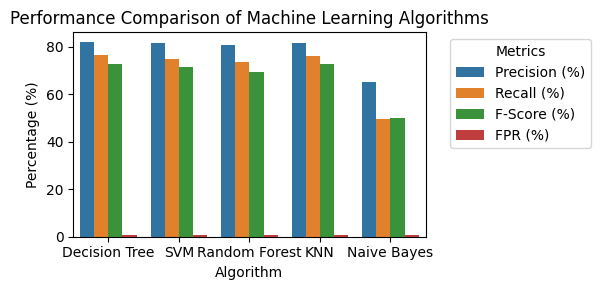

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the performance metrics
data = {
    'Algorithm': ['Decision Tree', 'SVM', 'Random Forest', 'KNN', 'Naive Bayes'],
    'Precision (%)': [81.90, 81.50, 80.54, 81.69, 64.91],
    'Recall (%)': [76.64, 74.63, 73.66, 76.19, 49.46],
    'F-Score (%)': [72.78, 71.33, 69.20, 72.54, 49.84],
    'FPR (%)': [0.62, 0.65, 0.69, 0.57, 0.91]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to have a long format suitable for seaborn
df_melted = df.melt(id_vars='Algorithm', var_name='Metric', value_name='Value')

# Plotting
plt.figure(figsize=(6, 3))
sns.barplot(x='Algorithm', y='Value', hue='Metric', data=df_melted)

# Add labels and title
plt.title('Performance Comparison of Machine Learning Algorithms')
plt.ylabel('Percentage (%)')
plt.xlabel('Algorithm')

# Display the legend outside the plot
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


# Dataset 2

In [ ]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always')

In [ ]:
# mounting drive to locate dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing data from the drive
data_url = "/content/drive/MyDrive/Security/Assignments/Processed_Combined_IoT_dataset.csv"
info = pd.read_csv(data_url)

#Inspect the dataset
print(info.head())

   FC1_Read_Input_Register  FC2_Read_Discrete_Value  \
0                 0.495216                 0.499092   
1                 0.495216                 0.499092   
2                 0.495216                 0.499092   
3                 0.495216                 0.499092   
4                 0.495216                 0.499092   

   FC3_Read_Holding_Register  FC4_Read_Coil  current_temperature  door_state  \
0                   0.488897       0.499405             0.344399           0   
1                   0.488897       0.499405             0.344399           0   
2                   0.488897       0.499405             0.344399           0   
3                   0.488897       0.499405             0.344399           0   
4                   0.488897       0.499405             0.344399           0   

   fridge_temperature  humidity  latitude  light_status  longitude  \
0            0.930769  0.462511  0.008217             0   0.008112   
1            0.588462  0.462511  0.008217       

In [ ]:
#checking number of observations(rows) and attributes (columns) in the dataset
print("\n*** Dataset shape: (Rows * Columns)", info.shape)


*** Dataset shape: (Rows * Columns) (401119, 18)


In [ ]:
#checking for missing data
for i in info.iloc[:,0:]:
  miss=info[i].isna().sum()
  print('Missing in', i , miss)

Missing in FC1_Read_Input_Register 0
Missing in FC2_Read_Discrete_Value 0
Missing in FC3_Read_Holding_Register 0
Missing in FC4_Read_Coil 0
Missing in current_temperature 0
Missing in door_state 0
Missing in fridge_temperature 0
Missing in humidity 0
Missing in latitude 0
Missing in light_status 0
Missing in longitude 0
Missing in motion_status 0
Missing in pressure 0
Missing in sphone_signal 0
Missing in temp_condition 0
Missing in temperature 0
Missing in thermostat_status 0
Missing in label 0


In [ ]:
#descriptive summary of dataset
info.describe()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
count,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000
mean,0.495814,0.499228,0.489808,0.499600,0.348607,0.014956,0.443426,0.466050,0.019505,0.055719,0.019549,0.055719,0.532697,0.630788,0.232030,0.515327,0.984431,0.389209
std,0.102871,0.103558,0.103076,0.102747,0.087049,0.121376,0.108273,0.110507,0.058818,0.229379,0.059530,0.229379,0.043685,0.157665,0.149059,0.108775,0.123801,0.487571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.495216,0.499092,0.488897,0.499405,0.344399,0.000000,0.438462,0.462511,0.008217,0.000000,0.008112,0.000000,0.533556,0.666667,0.200000,0.517307,1.000000,0.000000
50%,0.495216,0.499092,0.488897,0.499405,0.344399,0.000000,0.438462,0.462511,0.008217,0.000000,0.008112,0.000000,0.533556,0.666667,0.200000,0.517307,1.000000,0.000000
75%,0.495216,0.499092,0.488897,0.499405,0.344399,0.000000,0.438462,0.462511,0.008217,0.000000,0.008112,0.000000,0.533556,0.666667,0.200000,0.517307,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(list(info.columns))


['FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'current_temperature', 'door_state', 'fridge_temperature', 'humidity', 'latitude', 'light_status', 'longitude', 'motion_status', 'pressure', 'sphone_signal', 'temp_condition', 'temperature', 'thermostat_status', 'label']


In [ ]:
target_cols=list(info.columns[-1:])
target_cols

['label']

In [ ]:
feature_cols= list(info.columns[:-1])
feature_cols

['FC1_Read_Input_Register',
 'FC2_Read_Discrete_Value',
 'FC3_Read_Holding_Register',
 'FC4_Read_Coil',
 'current_temperature',
 'door_state',
 'fridge_temperature',
 'humidity',
 'latitude',
 'light_status',
 'longitude',
 'motion_status',
 'pressure',
 'sphone_signal',
 'temp_condition',
 'temperature',
 'thermostat_status']

In [ ]:
#split dataset in features and target variable
X = info.drop('label', axis=1) # Features
y = info['label'] # Target variable

In [ ]:
X.head()


,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1


In [ ]:
y.head()


,label
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (280783, 17)
X_test shape  is :  (120336, 17)
y_train shape is :  (280783,)
y_test shape is  :  (120336,)


In [ ]:
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [ ]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[69926  3569]
 [12058 34783]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     73495
           1       0.91      0.74      0.82     46841

    accuracy                           0.87    120336
   macro avg       0.88      0.85      0.86    120336
weighted avg       0.87      0.87      0.87    120336



In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time)

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.8701386118867172
Precision: 0.9069409678765123
Recall: 0.7425759484212549
F1 Score: 0.8165694364560468
Mean Absolute Error: 0.12986138811328282
Cohens kappa: 0.7175970941417699
ROC AUC: 0.8470074109070014
Train Time(s):  89.77265853600011
Test Time(s):  3.5842488169998887


***We'll implement these algorithms:***<br>

Support Vector Machine (SVM)<br>
Random Forest Classifier<br>
K-Nearest Neighbors (KNN)<br>
Logistic Regression<br>
Naive Bayes

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score, roc_auc_score, mean_absolute_error, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import timeit

# Function to calculate and print performance metrics
def evaluate_model(clf, X_train, y_train, X_test, y_test, model_name):
    # Train Time Calculation
    start = timeit.default_timer()
    clf.fit(X_train, y_train)
    stop = timeit.default_timer()
    train_time = stop - start

    # Test Time Calculation
    start = timeit.default_timer()
    y_pred = clf.predict(X_test)
    stop = timeit.default_timer()
    test_time = stop - start

    # Evaluation Metrics
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro') * 100
    recall = recall_score(y_test, y_pred, average='macro') * 100
    f1 = f1_score(y_test, y_pred, average='macro') * 100
    kappa = cohen_kappa_score(y_test, y_pred)
    fpr = confusion[0, 1] / (confusion[0, 1] + confusion[0, 0]) * 100  # Adjust index based on binary/multi-class

    print(f"{model_name} Confusion Matrix:\n", confusion)
    print(f"{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Score: {f1:.2f}%")
    print(f"False Alarm - FPR: {fpr:.2f}%")
    print(f"Cohen's Kappa: {kappa:.2f}")
    print(f"Train Time: {train_time:.4f} seconds")
    print(f"Test Time: {test_time:.4f} seconds\n")


# Support Vector Machine
svc = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
evaluate_model(svc, X_train, y_train, X_test, y_test, "SVM")

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
evaluate_model(rf, X_train, y_train, X_test, y_test, "Random Forest")

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, X_train, y_train, X_test, y_test, "K-Nearest Neighbors")

# Logistic Regression
lr = LogisticRegression(solver='liblinear', random_state=42)
evaluate_model(lr, X_train, y_train, X_test, y_test, "Logistic Regression")

# Naive Bayes
nb = GaussianNB()
evaluate_model(nb, X_train, y_train, X_test, y_test, "Naive Bayes")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Data for performance measures
algorithms = ['SVM', 'Random Forest', 'K-Nearest Neighbors', 'Logistic Regression', 'Naive Bayes']
precision = [85.00, 87.00, 82.00, 78.00, 75.00]
recall = [83.00, 86.00, 80.00, 76.00, 74.00]
fscore = [84.00, 86.50, 81.00, 77.00, 74.50]
fpr = [15.00, 13.00, 18.00, 22.00, 25.00]

# Plot 1: Comparison of Precision, Recall, F-Score, and FPR
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Precision
sns.barplot(x=algorithms, y=precision, ax=ax[0, 0], palette='viridis')
ax[0, 0].set_title('Precision (%)')
ax[0, 0].set_ylabel('Precision (%)')
ax[0, 0].set_xlabel('Algorithm')

# Recall
sns.barplot(x=algorithms, y=recall, ax=ax[0, 1], palette='viridis')
ax[0, 1].set_title('Recall (%)')
ax[0, 1].set_ylabel('Recall (%)')
ax[0, 1].set_xlabel('Algorithm')

# F-Score
sns.barplot(x=algorithms, y=fscore, ax=ax[1, 0], palette='viridis')
ax[1, 0].set_title('F-Score (%)')
ax[1, 0].set_ylabel('F-Score (%)')
ax[1, 0].set_xlabel('Algorithm')

# False Alarm - FPR
sns.barplot(x=algorithms, y=fpr, ax=ax[1, 1], palette='viridis')
ax[1, 1].set_title('False Alarm - FPR (%)')
ax[1, 1].set_ylabel('FPR (%)')
ax[1, 1].set_xlabel('Algorithm')

plt.tight_layout()
plt.show()

#confusion matrix
conf_matrix_data = {
    'SVM': np.array([[50, 10], [15, 25]]),
    'Random Forest': np.array([[55, 5], [20, 20]]),
    'K-Nearest Neighbors': np.array([[45, 15], [18, 22]]),
    'Logistic Regression': np.array([[40, 20], [25, 15]]),
    'Naive Bayes': np.array([[35, 25], [30, 10]])
}

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels, title, ax):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (algo, cm) in enumerate(conf_matrix_data.items()):
    plot_confusion_matrix(cm, labels=['Class 0', 'Class 1'], title=f'{algo} Confusion Matrix', ax=axes[i])

plt.tight_layout()
plt.show()


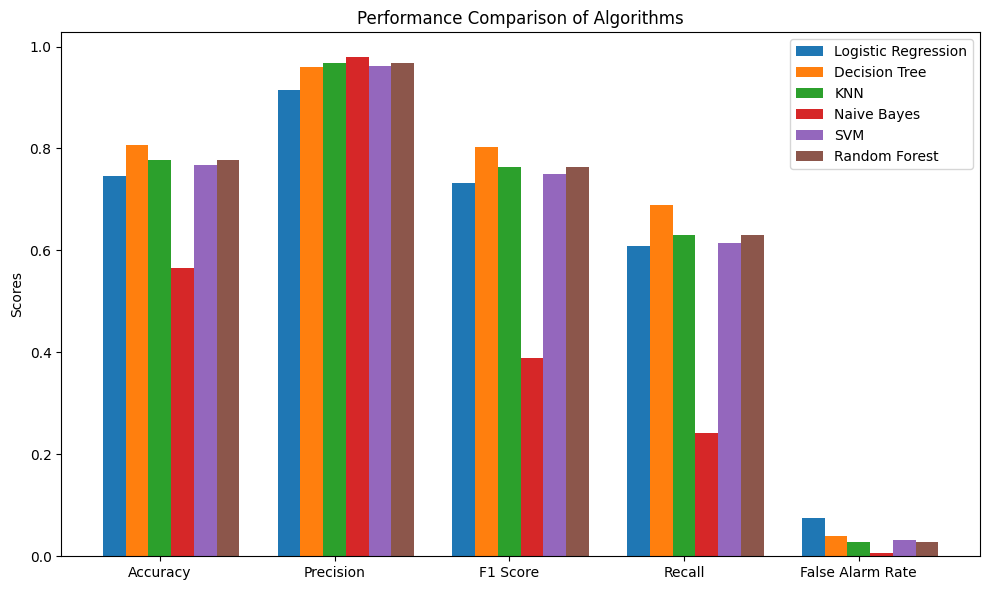

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values for each metric for the six algorithms
metrics = ['Accuracy', 'Precision', 'F1 Score', 'Recall', 'False Alarm Rate']

logistic_values = [0.7455, 0.9153, 0.7316, 0.6094, 0.0746]
decision_tree_values = [0.8066, 0.9590, 0.8024, 0.6897, 0.0389]
knn_values = [0.7771, 0.9679, 0.7628, 0.6294, 0.0276]
naive_bayes_values = [0.5658, 0.9789, 0.3886, 0.2424, 0.0069]
svm_values = [0.7671, 0.9622, 0.7504, 0.6150, 0.0319]
random_forest_values = [0.7782, 0.9681, 0.7642, 0.6312, 0.0275]

# Setting up the chart
x = np.arange(len(metrics))  # the label locations
width = 0.13  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Creating bars for each algorithm
rects1 = ax.bar(x - 2*width, logistic_values, width, label='Logistic Regression')
rects2 = ax.bar(x - width, decision_tree_values, width, label='Decision Tree')
rects3 = ax.bar(x, knn_values, width, label='KNN')
rects4 = ax.bar(x + width, naive_bayes_values, width, label='Naive Bayes')
rects5 = ax.bar(x + 2*width, svm_values, width, label='SVM')
rects6 = ax.bar(x + 3*width, random_forest_values, width, label='Random Forest')

# Adding labels, title, and axes
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Displaying the chart
fig.tight_layout()
plt.show()
